### Project Title : Bank Term Deposit Prediction

#### Importing Necessary Packages

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import imblearn
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.metrics import confusion_matrix , classification_report, f1_score, accuracy_score,\
precision_score, recall_score, fbeta_score, make_scorer
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import os
import pickle
import warnings
warnings.filterwarnings('ignore')

print("All libraries imported successfully!")


All libraries imported successfully!


#### Loading Dataset

In [26]:
data = pd.read_csv('Dataset/bank.csv', sep=';', quotechar='"')
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [27]:
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


#### Exploratory Data Analysis 

In [28]:
#checking data types and non-null values

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [29]:
#checking unique values for each column
data.nunique()

age            67
job            12
marital         3
education       4
default         2
balance      2353
housing         2
loan            2
contact         3
day            31
month          12
duration      875
campaign       32
pdays         292
previous       24
poutcome        4
y               2
dtype: int64

In [30]:
#checking summary statistics for numerical columns 
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


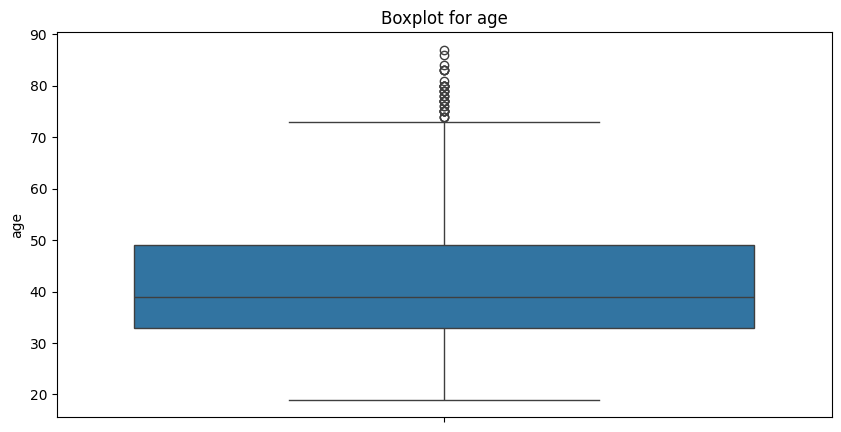

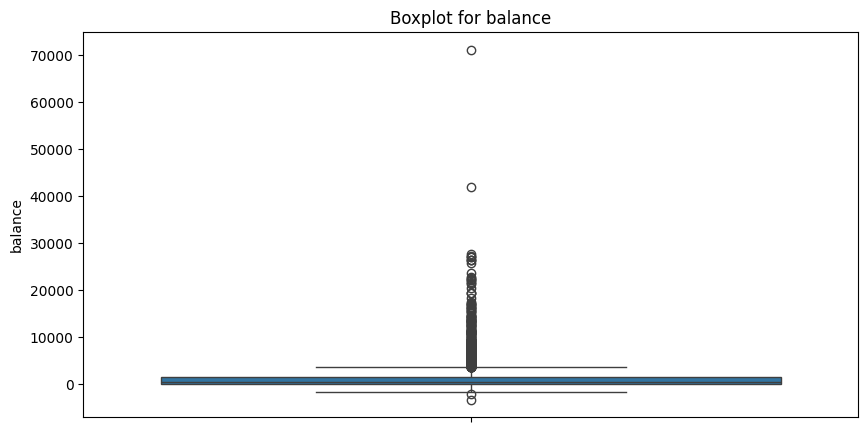

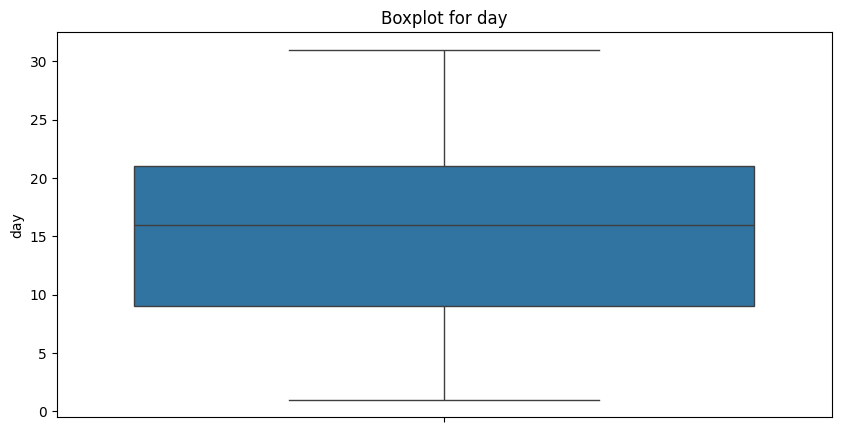

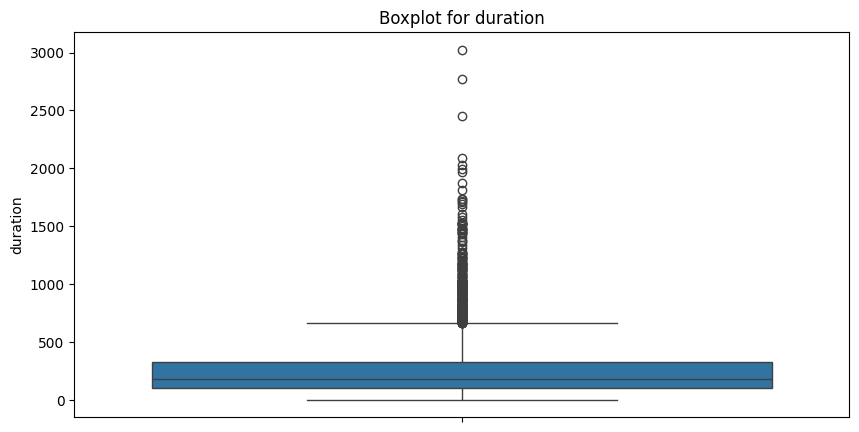

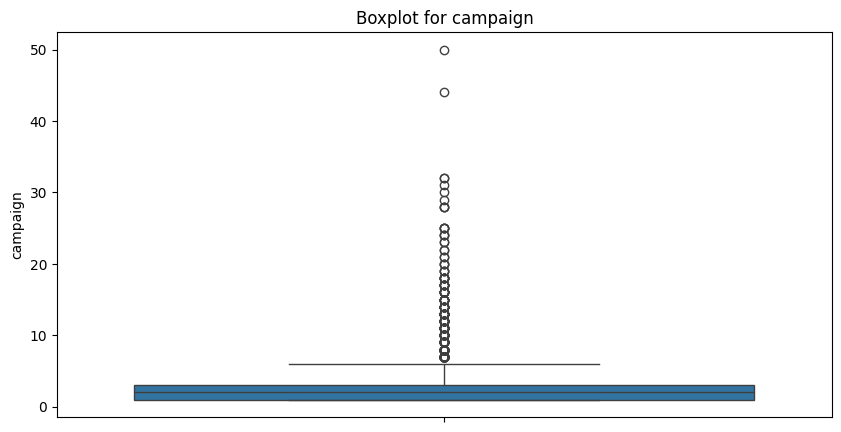

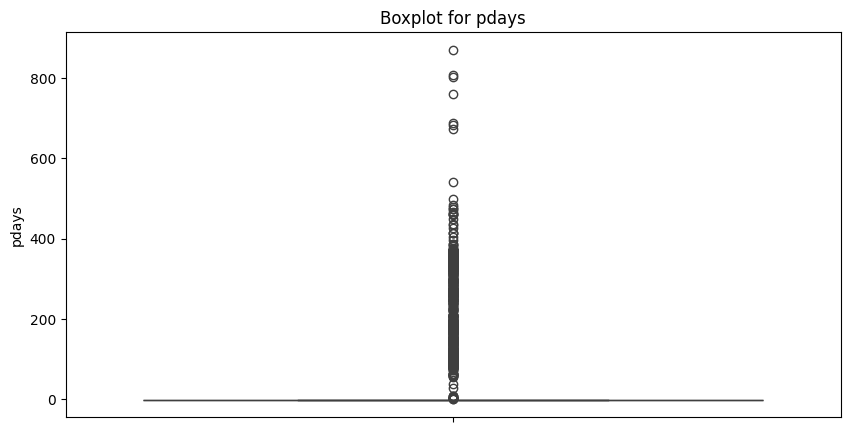

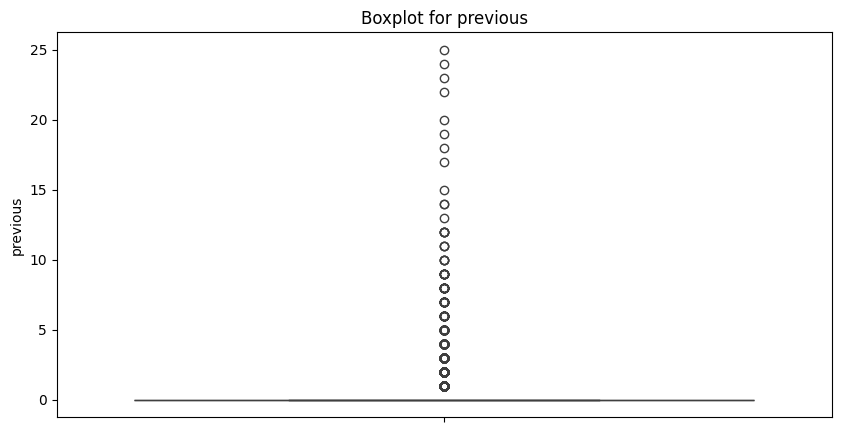

In [31]:
#checking for outliers in numerical columns
numeric_cols =['age', 'balance', 'day',	'duration',	'campaign',	'pdays', 'previous']

for col in numeric_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

In [32]:
# Detect outliers using IQR for each numeric column
for col in numeric_cols:
    Q1 = data[col].quantile(0.25)  # First quartile
    Q3 = data[col].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"{col}:")
    print(f"  Lower Bound: {lower_bound}")
    print(f"  Upper Bound: {upper_bound}")
    print(f"  Outliers Count: {((data[col] < lower_bound) | (data[col] > upper_bound)).sum()}\n")


age:
  Lower Bound: 9.0
  Upper Bound: 73.0
  Outliers Count: 38

balance:
  Lower Bound: -2047.5
  Upper Bound: 3596.5
  Outliers Count: 506

day:
  Lower Bound: -9.0
  Upper Bound: 39.0
  Outliers Count: 0

duration:
  Lower Bound: -233.5
  Upper Bound: 666.5
  Outliers Count: 330

campaign:
  Lower Bound: -2.0
  Upper Bound: 6.0
  Outliers Count: 318

pdays:
  Lower Bound: -1.0
  Upper Bound: -1.0
  Outliers Count: 816

previous:
  Lower Bound: 0.0
  Upper Bound: 0.0
  Outliers Count: 816



#### Summary of Outliers

**Age:** Outliers include individuals older than 73. \
**Balance:** Outliers include negative balances and high positive balances above 3596.\
**Day:** No outliers. All values lie within the range. \
**Duration:** Outliers include call durations greater than 666 seconds (11 minutes).\
**Campaign:** Outliers include clients who were contacted more than 6 times. \
**Pdays:** Outliers include all positive values for pdays. -1 means client wasn't previously contacted. Positive pdays indicates days since last contacted.\
**Previous:** Outliers are all values greater than 0, indicating prior contacts.

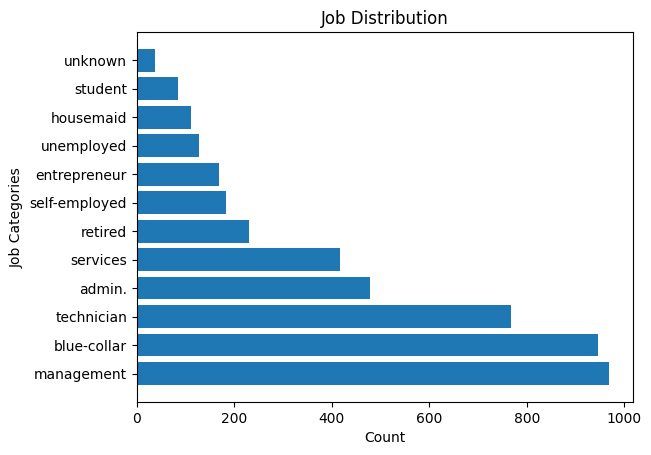

In [35]:
# Visualize distribution of categorical features
job_counts = data['job'].value_counts()

# Plot using barh
plt.barh(job_counts.index, job_counts.values)

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Job Categories')
plt.title('Job Distribution')
plt.show()

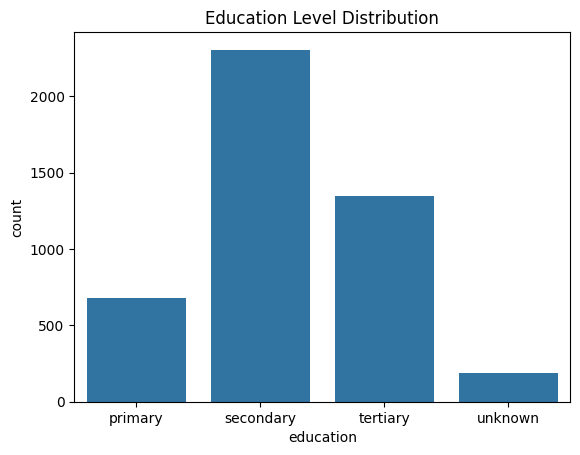

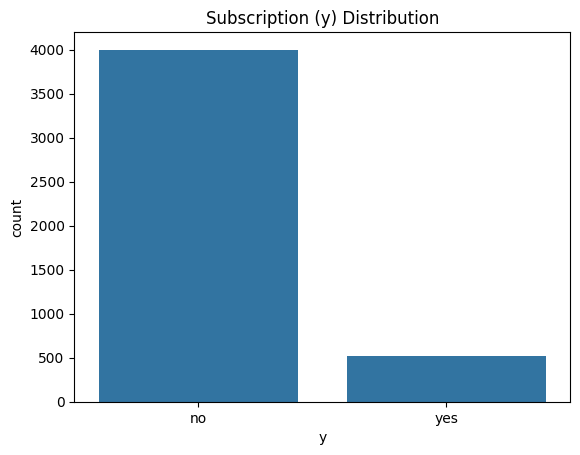

In [33]:
sns.countplot(x='education', data=data)
plt.title('Education Level Distribution')
plt.show()

sns.countplot(x='y', data=data)
plt.title('Subscription (y) Distribution')
plt.show()

The target variable 'y' is imbalanced.

#### Feature Engineering

The following new features will be added:\
**Age_group:** Categorize the age column into meaningful groups such as young, middle_age, senior.\
**Recent_contact:** Convert the pdays column into a binary feature that indicates whether the client was contacted recently or not.\
**Financial_stability:**  Combine balance, housing, and loan to create a binary feature that indicates financial stability.\
**Duration_per_contact:** Calculate the average duration of each contact (duration / campaign) for each client.\
**Contact_method:** Create a binary feature from the contact column that distinguishes between known and unknown contact methods


In [36]:
# 1. Age Group
def categorize_age(age):
    if age < 30:
        return 'young'
    elif 30 <= age < 60:
        return 'middle_aged'
    else:
        return 'senior'

#Apply the function to the age column
data['age_group'] = data['age'].apply(categorize_age)

# 2. Recent Contact
data['recent_contact'] = (data['pdays'] != -1).astype(int)

# 3. Financial Stability
def compute_financial_stability(row):
    if row['balance'] > 0 and row['housing'] == 'no' and row['loan'] == 'no':
        return 1
    else:
        return 0
data['financial_stability'] = data.apply(compute_financial_stability, axis=1)

# 4. Duration per Contact
data['duration_per_contact'] = data['duration'] / data['campaign']
data['duration_per_contact'] = data['duration_per_contact'].fillna(0)


# 5. Contact Method
data['contact_known'] = data['contact'].map({'telephone': 1, 'cellular': 1, 'unknown': 0})


In [38]:
#checking dataset with added features
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,y,age_group,recent_contact,financial_stability,duration_per_contact,contact_known
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,...,1,-1,0,unknown,no,middle_aged,0,1,79.00,1
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,...,1,339,4,failure,no,middle_aged,1,0,220.00,1
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,...,1,330,1,failure,no,middle_aged,1,0,185.00,1
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,...,4,-1,0,unknown,no,middle_aged,0,0,49.75,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,...,1,-1,0,unknown,no,middle_aged,0,0,226.00,0
